In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import transforms
from datasets import load_dataset
from torch.optim import AdamW
import pytorch_lightning as pl
from torch.nn import functional as F

from simple_vit import SimpleViT

# Hyperparameters
BATCH_SIZE = 64
IMAGE_SIZE = 160  # Assume square images for simplicity
PATCH_SIZE = 16
NUM_CLASSES = 100  # ImageNet-100 has 100 classes
DIM = 512
DEPTH = 6
HEADS = 8
MLP_DIM = 1024
LR = 3e-4
EPOCHS = 90
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# Data Preparation
transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.Lambda(lambda img: img.convert("RGB")),  # Ensure everything converted to 3 channels
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Load dataset and split
using_scc  = False
#If using scc to train it, 
if using_scc:
    dataset = load_dataset("ilee0022/ImageNet100", cache_dir='/projectnb/ec523kb/projects/teams_Fall_2024/Team_3/hg_cache')
else:
    dataset = load_dataset("ilee0022/ImageNet100")

train_data = dataset['train']
test_data = dataset['validation']

# Custom Dataset to apply transforms
class CustomImageDataset(torch.utils.data.Dataset):
    def __init__(self, dataset, transform):
        self.dataset = dataset
        self.transform = transform

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        sample = self.dataset[idx]
        image = self.transform(sample['image'])
        label = sample['label']
        return image, label

# DataLoader
train_loader = DataLoader(CustomImageDataset(train_data, transform), batch_size=BATCH_SIZE, shuffle=True, num_workers=31)
test_loader = DataLoader(CustomImageDataset(test_data, transform), batch_size=BATCH_SIZE, num_workers=31)

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/30 [00:00<?, ?it/s]

In [2]:
train_loader = DataLoader(CustomImageDataset(train_data, transform), batch_size=2, shuffle=True, num_workers=31)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.92156863..1.0].


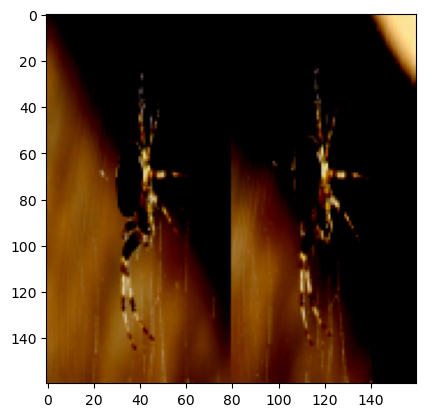

In [3]:
import numpy as np
import matplotlib.pyplot as plt

img, label = next(iter(train_loader))
plt.imshow(np.transpose(img[0].numpy(), (1, 2, 0)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99215686..0.8745098].


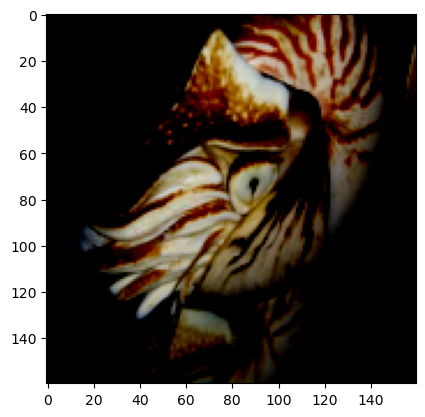

In [4]:
plt.imshow(np.transpose(img[1].numpy(), (1, 2, 0)))

In [6]:
from simple_vit import LafPatchExtractor

In [7]:
laf1=[[1,0,-1.],[0,1,-1.]]
laf2=[[1,0,-1],[0,1,1.]]
laf3=[[1,0,1.],[0,1,1.]]
laf4=[[1,0,1.],[0,1,1.]]

In [8]:
laf = torch.tensor([[laf1,laf2,laf3,laf4],[laf1,laf2,laf3,laf4]])

In [9]:
laf_to_patch = LafPatchExtractor(patch_size=64)

y = laf_to_patch(img, laf)

In [10]:
from torchvision.transforms.functional import to_pil_image
from torchvision.utils import make_grid


def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False, figsize=(10, 5))
    for i, img in enumerate(imgs):
        img = img.detach()
        img = to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99128985..0.8486462].


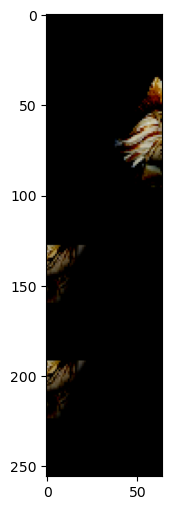

In [11]:
plt.figure(figsize=(8, 6))
plt.imshow(np.transpose(y[1].numpy(), (1, 2, 0)))